In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 8])
sns.set_style('darkgrid')

<Figure size 1200x800 with 0 Axes>

In [5]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [9]:
x_train.shape

(60000, 28, 28)

In [11]:
single_image = x_train[0]

single_image.shape

(28, 28)

In [12]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

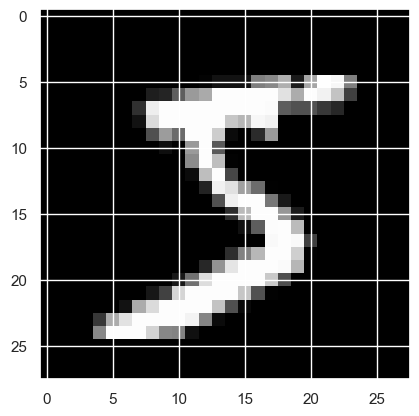

In [15]:
plt.imshow(single_image, cmap='gray')

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train.shape

(60000,)

In [20]:
y_example = to_categorical(y_train)

In [21]:
y_example.shape

(60000, 10)

In [23]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_cat_test = to_categorical(y_test, num_classes=10)

y_cat_test.shape

(10000, 10)

In [25]:
y_cat_train = to_categorical(y_train, num_classes=10)

y_cat_train.shape

(60000, 10)

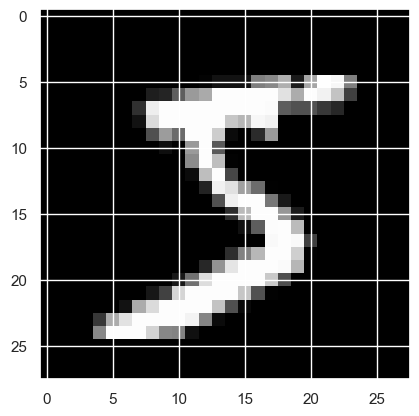

In [28]:
plt.imshow(single_image, cmap='gray')

In [29]:
single_image.max()

255

In [30]:
single_image.min()

0

In [31]:
x_train = x_train / 255
x_test = x_test / 255

In [34]:
scaled_image = x_train[0]

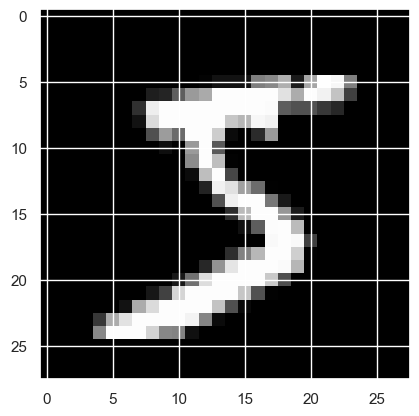

In [35]:
plt.imshow(scaled_image, cmap='gray')

In [36]:
scaled_image.max()

1.0

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [39]:
x_train.shape

(60000, 28, 28, 1)

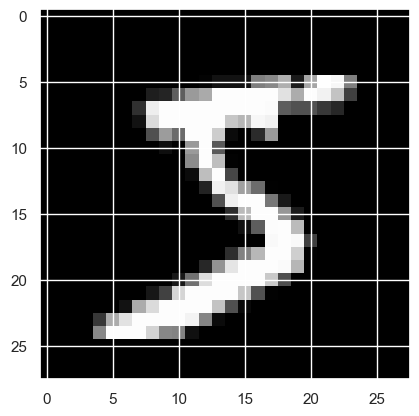

In [42]:
plt.imshow(x_train[0], cmap='gray')

In [44]:
x_test.shape

(10000, 28, 28)

In [45]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [49]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4),
          input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# OUTPUT LAYER SOFTMAX --> MULTI CLASS
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [52]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(
    x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10


2024-03-10 09:57:28.729101: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 42s 22ms/step - loss: 0.1384 - accuracy: 0.9570 - val_loss: 0.0588 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0476 - accuracy: 0.9857 - val_loss: 0.0437 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0537 - val_accuracy: 0.9832


In [55]:
metrics = pd.DataFrame(model.history.history)

metrics

,loss,accuracy,val_loss,val_accuracy
0,0.138434,0.956983,0.058774,0.9798
1,0.047565,0.985667,0.043730,0.9851
2,0.030636,0.990683,0.053738,0.9832


<Axes: >

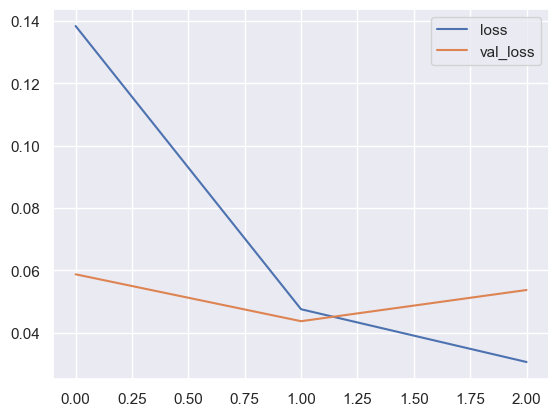

In [56]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

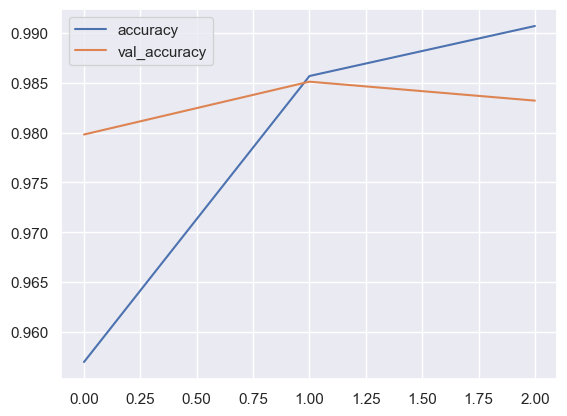

In [58]:
metrics[['accuracy', 'val_accuracy']].plot()